In [185]:
# データ分析に必要なライブラリを読み込む
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

# font設定
%pip install japanize-matplotlib
import japanize_matplotlib 
sns.set(font='IPAexGothic')
matplotlib.rcParams["font.family"] = "IPAexGothic"

Note: you may need to restart the kernel to use updated packages.


In [186]:
key_image = pd.read_csv("/workspace/walkAnalysis/pointData/keyImage.csv")
# NaNを空白文字列に置き換える
key_image = key_image.fillna("")
key_image

,Front,Time,Side,Time.1
0,右踵接地,5.1,左踵接地,3.34
1,右全足底接地,5.2,左全足底接地,3.47
2,左足趾離地,5.34,対側足趾離地,3.60
3,左踵接地,5.74,対側踵接地,4.04
4,左全足底接地,5.87,対側全足底接地,4.17
5,右足趾離地,5.9,左足趾離地,4.24
6,右踵接地(2回目),6.34,左踵接地(2回目),4.67
7,右全足底接地,6.47,右踵接地,10.34
8,左足趾離地(2回目),6.54,右全足底接地,10.44
9,左踵接地(2回目),6.97,対側足趾離地,10.54


In [187]:
front = pd.read_csv("/workspace/walkAnalysis/pointData/frontTrim.csv")

front = front[(front['t'] >= 5.10) & (front['t'] <= 6.97)]
front['t'] = front['t'] - front['t'][0]
front.head()

,t,R_shoulder_x,R_shoulder_y,L_shoulder_x,L_shoulder_y,R_asis_x,R_asis_y,L_asis_x,L_asis_y,R_knee_x,R_knee_y,L_knee_x,L_knee_y,R_foot_x,R_foot_y,L_foot_x,L_foot_y
0,0.00,-123.98,167.38,18.45,162.79,-113.57,-10.49,-4.45,-4.84,-97.83,-182.18,-27.57,-179.59,-95.89,-325.78,-40.76,-307.55
1,0.03,-124.98,168.38,17.45,161.80,-114.58,-10.49,-5.45,-6.84,-97.82,-184.17,-27.55,-181.59,-94.29,-331.05,-40.76,-307.55
2,0.06,-124.98,170.38,15.45,162.80,-116.58,-10.49,-7.44,-7.84,-98.81,-184.19,-26.57,-188.61,-94.66,-334.34,-39.76,-307.55
3,0.10,-132.98,167.38,14.13,164.80,-118.56,-7.49,-8.44,-7.84,-100.82,-184.20,-26.58,-189.61,-93.44,-335.33,-40.76,-301.22
4,0.13,-133.97,172.38,12.51,168.42,-120.55,-3.49,-9.44,-6.84,-101.84,-182.20,-26.59,-189.61,-93.45,-335.33,-37.94,-295.30


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


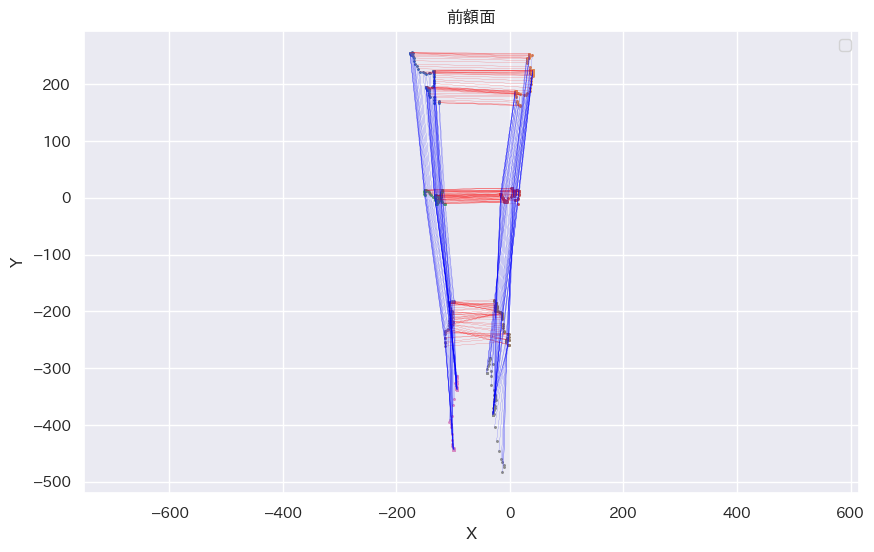

In [188]:
# グラフの描画
plt.figure(figsize=(10, 6))
plt.title('前額面')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.grid(True)

landamrks = ['shoulder','asis','knee','foot']

previous_landmark = None

for landmark in landamrks:
  plt.scatter(front[f'R_{landmark}_x'], front[f'R_{landmark}_y'],  marker='.', s=5)
  plt.scatter(front[f'L_{landmark}_x'], front[f'L_{landmark}_y'],  marker='.', s=5)
  
  # 各点をつなぐ線を描画
  for i in range(len(front[f'R_{landmark}_x'])):
      if landmark == 'foot':
          break
          
      
      plt.plot([front[f'R_{landmark}_x'][i], front[f'L_{landmark}_x'][i]],
              [front[f'R_{landmark}_y'][i], front[f'L_{landmark}_y'][i]],
              color='red', linestyle='-', linewidth=0.1)
      

  if previous_landmark == None:
    previous_landmark = landmark
  
  else:
    # 各点をつなぐ線を描画
    for i in range(len(front[f'R_{landmark}_x'])):
        plt.plot([front[f'R_{landmark}_x'][i], front[f'R_{previous_landmark}_x'][i]],
                [front[f'R_{landmark}_y'][i], front[f'R_{previous_landmark}_y'][i]],
                color='blue', linestyle='-', linewidth=0.1)
        
        plt.plot([front[f'L_{landmark}_x'][i], front[f'L_{previous_landmark}_x'][i]],
                [front[f'L_{landmark}_y'][i], front[f'L_{previous_landmark}_y'][i]],
                color='blue', linestyle='-', linewidth=0.1)
    
    previous_landmark = landmark


In [189]:
right_side = pd.read_csv("/workspace/walkAnalysis/pointData/sideRightTrim.csv")

right_side = right_side[(right_side['t'] >= 10.34) & (right_side['t'] <= 11.54)]
right_side['t'] = right_side['t'] - right_side['t'][0]
right_side.head()

,t,R_shoulder_x,R_shoulder_y,R_asis_x,R_asis_y,R_hip_x,R_hip_y,R_knee_x,R_knee_y,R_leg_x,R_leg_y,R_ancle_x,R_ancle_y,R_heel_x,R_heel_y,R_toe_x,R_toe_y
0,0.00,-843.92,249.79,-794.35,7.31,-839.82,-52.78,-742.97,-229.30,-746.17,-251.38,-679.58,-413.24,-678.50,-437.06,-624.36,-425.15
1,0.03,-827.92,246.80,-775.36,5.32,-819.82,-53.79,-722.96,-230.30,-727.17,-251.38,-672.58,-413.24,-673.50,-437.06,-612.27,-431.65
2,0.06,-810.92,245.79,-756.35,5.33,-798.82,-52.30,-701.96,-229.29,-707.17,-251.37,-666.58,-413.22,-669.49,-437.07,-608.59,-442.41
3,0.10,-793.92,245.79,-736.36,8.34,-776.81,-50.78,-683.96,-228.29,-683.59,-246.04,-659.25,-416.46,-668.49,-438.06,-605.17,-443.39
4,0.13,-776.92,246.79,-717.36,11.33,-754.80,-46.79,-665.54,-225.81,-669.34,-247.13,-662.58,-413.20,-667.50,-438.06,-605.17,-443.41


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


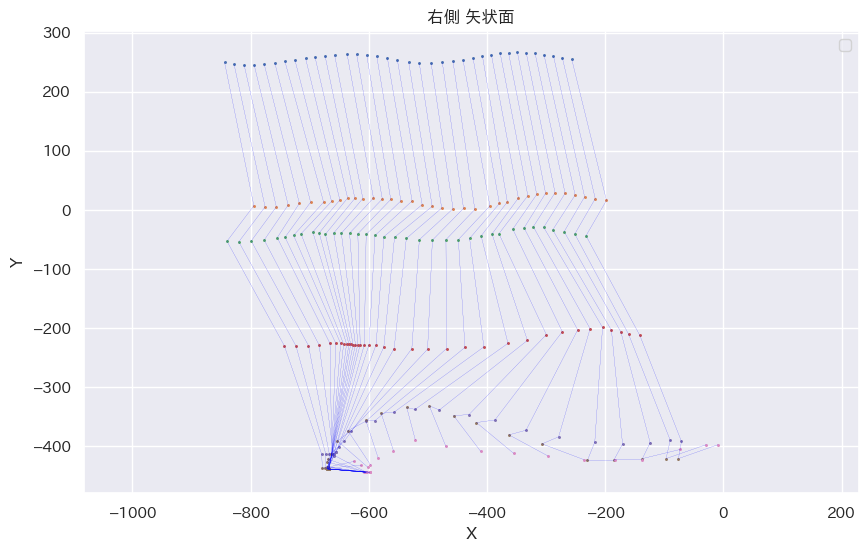

In [190]:
# グラフの描画
plt.figure(figsize=(10, 6))
plt.title('右側 矢状面')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.grid(True)

landamrks = ['shoulder','asis','hip','knee','ancle','heel','toe']

previous_landmark = None

for landmark in landamrks:
  plt.scatter(right_side[f'R_{landmark}_x'], right_side[f'R_{landmark}_y'],  marker='.', s=5)

  if previous_landmark == None:
    previous_landmark = landmark
  
  else:
    # 各点をつなぐ線を描画
    for i in range(len(right_side[f'R_{landmark}_x'])):
        plt.plot([right_side[f'R_{landmark}_x'][i], right_side[f'R_{previous_landmark}_x'][i]],
                [right_side[f'R_{landmark}_y'][i], right_side[f'R_{previous_landmark}_y'][i]],
                color='blue', linestyle='-', linewidth=0.1)
        
    
    previous_landmark = landmark

In [191]:
left_side = pd.read_csv("/workspace/walkAnalysis/pointData/sideLeftTrim.csv")

left_side = left_side[(left_side['t'] >= 3.34) & (left_side['t'] <= 4.67)]
left_side['t'] = left_side['t'] - left_side['t'][0]
left_side.head()

,t,L_ancle_x,L_ancle_y,L_heel_x,L_heel_y,L_toe_x,L_toe_y,L_leg_x,L_leg_y,L_knee_x,L_knee_y,L_hip_x,L_hip_y,L_asis_x,L_asis_y,L_shoulder_x,L_shoulder_y
0,0.00,345.83,-389.40,348.67,-422.05,290.12,-404.02,374.13,-219.73,373.50,-208.10,461.05,-28.42,423.92,24.78,482.62,263.05
1,0.03,340.85,-392.40,346.68,-422.04,286.27,-414.14,365.13,-223.73,364.51,-208.11,448.05,-31.42,411.91,22.79,473.61,261.06
2,0.07,335.85,-393.42,344.67,-422.07,283.43,-420.21,355.13,-224.73,356.51,-208.11,433.05,-32.42,399.90,21.81,463.61,259.05
3,0.10,333.84,-394.43,346.74,-423.04,281.51,-423.25,344.52,-228.60,346.51,-208.12,415.05,-31.42,387.91,22.83,452.61,256.05
4,0.13,332.82,-395.43,346.74,-422.06,279.51,-424.23,338.52,-228.60,338.59,-209.75,409.29,-30.42,375.92,24.85,441.62,254.05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


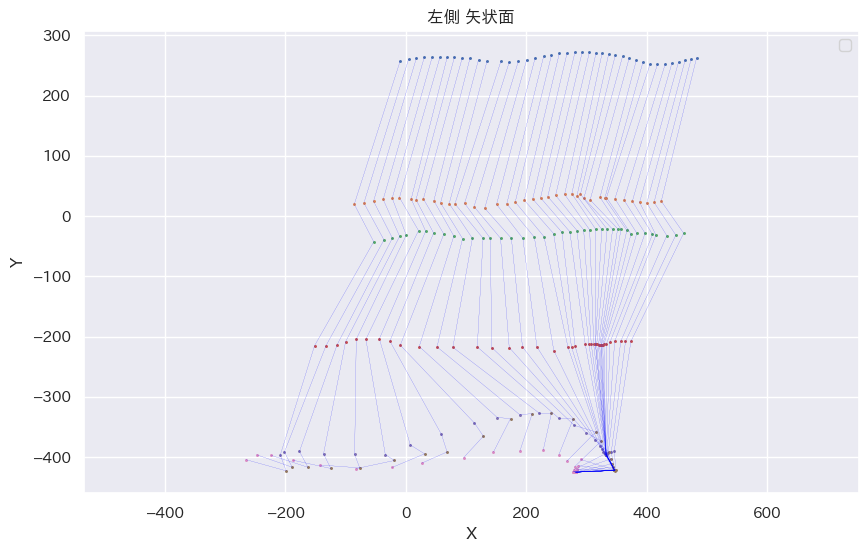

In [192]:
# グラフの描画
plt.figure(figsize=(10, 6))
plt.title('左側 矢状面')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.grid(True)

landamrks = ['shoulder','asis','hip','knee','ancle','heel','toe']

previous_landmark = None

for landmark in landamrks:
  plt.scatter(left_side[f'L_{landmark}_x'], left_side[f'L_{landmark}_y'],  marker='.', s=5)

  if previous_landmark == None:
    previous_landmark = landmark
  
  else:
    # 各点をつなぐ線を描画
    for i in range(len(left_side[f'L_{landmark}_x'])):
        plt.plot([left_side[f'L_{landmark}_x'][i], left_side[f'L_{previous_landmark}_x'][i]],
                [left_side[f'L_{landmark}_y'][i], left_side[f'L_{previous_landmark}_y'][i]],
                color='blue', linestyle='-', linewidth=0.1)

    
    previous_landmark = landmark

In [193]:

# 4点の座標から成る2直線のなす角を求める関数
def calculate_angle_between_lines(x1_1, y1_1, x2_1, y2_1, x1_2, y1_2, x2_2, y2_2):
    # 直線1の傾きを計算
    m1 = (y2_1 - y1_1) / (x2_1 - x1_1)
    
    # 直線2の傾きを計算
    m2 = (y2_2 - y1_2) / (x2_2 - x1_2)

    # 2つの直線のなす角を計算
    angle_rad = math.atan(abs((m2 - m1) / (1 + m1 * m2)))

    # ラジアンから度に変換
    angle_deg = math.degrees(angle_rad)

    return angle_deg

# 2点のX,Y座標を与え2点を結ぶ直線とX軸とのなす角を求める関数
def calculate_angle(x1, y1, x2, y2):
    # 2点の座標からベクトルを計算
    dx = x2 - x1
    dy = y2 - y1

    # アークタンジェントを使用して角度を計算（ラジアン）
    angle_rad = math.atan2(dy, dx)

    # ラジアンから度に変換
    angle_deg = math.degrees(angle_rad)

    return angle_deg

In [199]:
left_side['L_hip_angle'] = left_side.apply(lambda row: calculate_angle_between_lines(row['L_shoulder_x'], row['L_shoulder_y'], row['L_hip_x'], row['L_hip_y'],row['L_hip_x'], row['L_hip_y'], row['L_knee_x'], row['L_knee_y']), axis=1)
left_side['L_knee_angle'] = left_side.apply(lambda row: calculate_angle_between_lines(row['L_hip_x'], row['L_hip_y'], row['L_knee_x'], row['L_knee_y'],row['L_knee_x'], row['L_knee_y'], row['L_ancle_x'], row['L_ancle_y']), axis=1)
left_side['L_ancle_angle'] = left_side.apply(lambda row: calculate_angle_between_lines(90 - row['L_leg_x'], row['L_leg_y'], row['L_ancle_x'], row['L_ancle_y'],row['L_heel_x'], row['L_heel_y'], row['L_toe_x'], row['L_toe_y']), axis=1)

right_side['R_hip_angle'] = right_side.apply(lambda row: calculate_angle_between_lines(row['R_shoulder_x'], row['R_shoulder_y'], row['R_hip_x'], row['R_hip_y'],row['R_hip_x'], row['R_hip_y'], row['R_knee_x'], row['R_knee_y']), axis=1)
right_side['R_knee_angle'] = right_side.apply(lambda row: calculate_angle_between_lines(row['R_hip_x'], row['R_hip_y'], row['R_knee_x'], row['R_knee_y'],row['R_knee_x'], row['R_knee_y'], row['R_ancle_x'], row['R_ancle_y']), axis=1)
right_side['R_ancle_angle'] = right_side.apply(lambda row: calculate_angle_between_lines(90 - row['R_leg_x'], row['R_leg_y'], row['R_ancle_x'], row['R_ancle_y'],row['R_heel_x'], row['R_heel_y'], row['R_toe_x'], row['R_toe_y']), axis=1)

right_side.head()



,t,R_shoulder_x,R_shoulder_y,R_asis_x,R_asis_y,R_hip_x,R_hip_y,R_knee_x,R_knee_y,R_leg_x,R_leg_y,R_ancle_x,R_ancle_y,R_heel_x,R_heel_y,R_toe_x,R_toe_y,R_hip_angle,R_knee_angle,R_ancle_angle
0,0.00,-843.92,249.79,-794.35,7.31,-839.82,-52.78,-742.97,-229.30,-746.17,-251.38,-679.58,-413.24,-678.50,-437.06,-624.36,-425.15,27.975605,9.736807,6.311355
1,0.03,-827.92,246.80,-775.36,5.32,-819.82,-53.79,-722.96,-230.30,-727.17,-251.38,-672.58,-413.24,-673.50,-437.06,-612.27,-431.65,27.212237,13.358745,1.151534
2,0.06,-810.92,245.79,-756.35,5.33,-798.82,-52.30,-701.96,-229.29,-707.17,-251.37,-666.58,-413.22,-669.49,-437.07,-608.59,-442.41,26.365776,17.802053,11.320835
3,0.10,-793.92,245.79,-736.36,8.34,-776.81,-50.78,-683.96,-228.29,-683.59,-246.04,-659.25,-416.46,-668.49,-438.06,-605.17,-443.39,24.310774,20.131549,11.594381
4,0.13,-776.92,246.79,-717.36,11.33,-754.80,-46.79,-665.54,-225.81,-669.34,-247.13,-662.58,-413.20,-667.50,-438.06,-605.17,-443.41,22.192154,25.596040,11.567425


Text(0.5, 0, '時間')

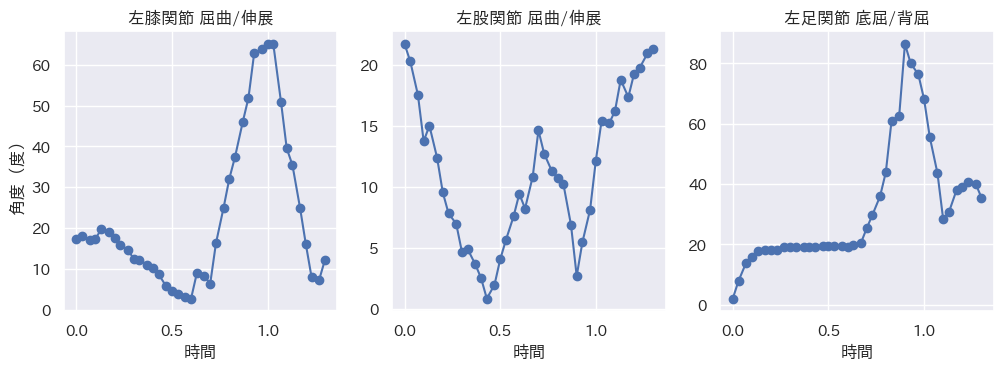

In [195]:
# 折れ線グラフを描画

# 図全体のサイズを指定
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot( left_side['t'], left_side['L_knee_angle'], marker='o')
plt.title('左膝関節 屈曲/伸展')
plt.xlabel('時間')
plt.ylabel('角度（度）')

plt.subplot(2, 3, 2)
plt.plot( left_side['t'], left_side['L_hip_angle'], marker='o')
plt.title('左股関節 屈曲/伸展')
plt.xlabel('時間')

plt.subplot(2, 3, 3)
plt.plot( left_side['t'], left_side['L_ancle_angle'], marker='o')
plt.title('左足関節 底屈/背屈')
plt.xlabel('時間')

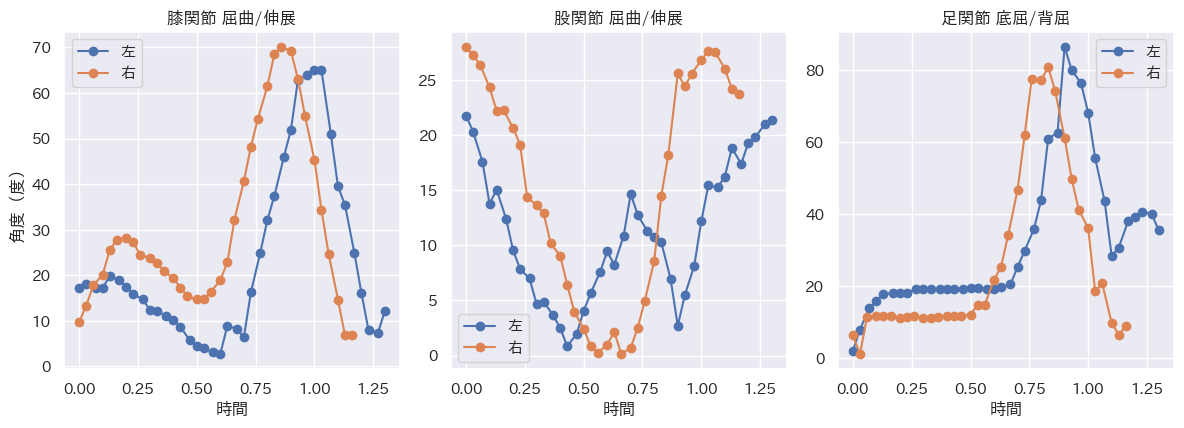

In [213]:
# 図全体のサイズを指定
plt.figure(figsize=(12, 8))
# サブプロットを作成（1行2列の構成）

plt.subplot(2, 3, 1)
plt.plot( left_side['t'], left_side['L_knee_angle'], marker='o', label="左")
plt.plot( right_side['t'], right_side['R_knee_angle'], marker='o', label="右")
plt.title('膝関節 屈曲/伸展')
plt.xlabel('時間')
plt.ylabel('角度（度）')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot( left_side['t'], left_side['L_hip_angle'], marker='o', label="左")
plt.plot( right_side['t'], right_side['R_hip_angle'], marker='o', label="右")
plt.title('股関節 屈曲/伸展')
plt.xlabel('時間')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot( left_side['t'], left_side['L_ancle_angle'], marker='o', label="左")
plt.plot( right_side['t'], right_side['R_ancle_angle'], marker='o', label="右")
plt.title('足関節 底屈/背屈')
plt.xlabel('時間')
plt.legend()

plt.tight_layout()  # グラフが重ならないように調整
plt.show()



In [204]:
front['shoulder_horizonal_angle'] = front.apply(lambda row: calculate_angle(row['R_shoulder_x'], row['R_shoulder_y'], row['L_shoulder_x'], row['L_shoulder_y']), axis=1)
front['asis_horizonal_angle'] = front.apply(lambda row: calculate_angle(row['R_asis_x'], row['R_asis_y'], row['L_asis_x'], row['L_asis_y']), axis=1)
front['L_FTA'] = front.apply(lambda row: calculate_angle_between_lines(row['L_asis_x'], row['L_asis_y'], row['L_knee_x'], row['L_knee_y'],row['L_knee_x'],row['L_knee_y'],row['L_foot_x'],row['L_foot_y']), axis=1)
front['R_FTA'] = front.apply(lambda row: calculate_angle_between_lines(row['R_asis_x'], row['R_asis_y'], row['R_knee_x'], row['R_knee_y'],row['R_knee_x'],row['R_knee_y'],row['R_foot_x'],row['R_foot_y']), axis=1)

front.head()

,t,R_shoulder_x,R_shoulder_y,L_shoulder_x,L_shoulder_y,R_asis_x,R_asis_y,L_asis_x,L_asis_y,R_knee_x,...,L_knee_x,L_knee_y,R_foot_x,R_foot_y,L_foot_x,L_foot_y,shoulder_horizonal_angle,asis_horizonal_angle,L_FTA,R_FTA
0,0.00,-123.98,167.38,18.45,162.79,-113.57,-10.49,-4.45,-4.84,-97.83,...,-27.57,-179.59,-95.89,-325.78,-40.76,-307.55,-1.845795,2.964006,1.651438,4.464051
1,0.03,-124.98,168.38,17.45,161.80,-114.58,-10.49,-5.45,-6.84,-97.82,...,-27.55,-181.59,-94.29,-331.05,-40.76,-307.55,-2.645077,1.915621,1.220742,4.135199
2,0.06,-124.98,170.38,15.45,162.80,-116.58,-10.49,-7.44,-7.84,-98.81,...,-26.57,-188.61,-94.66,-334.34,-39.76,-307.55,-3.089660,1.390911,0.287184,4.258002
3,0.10,-132.98,167.38,14.13,164.80,-118.56,-7.49,-8.44,-7.84,-100.82,...,-26.58,-189.61,-93.44,-335.33,-40.76,-301.22,-1.004744,-0.182105,1.541565,2.937089
4,0.13,-133.97,172.38,12.51,168.42,-120.55,-3.49,-9.44,-6.84,-101.84,...,-26.59,-189.61,-93.45,-335.33,-37.94,-295.30,-1.548580,-1.726962,0.768893,2.840691


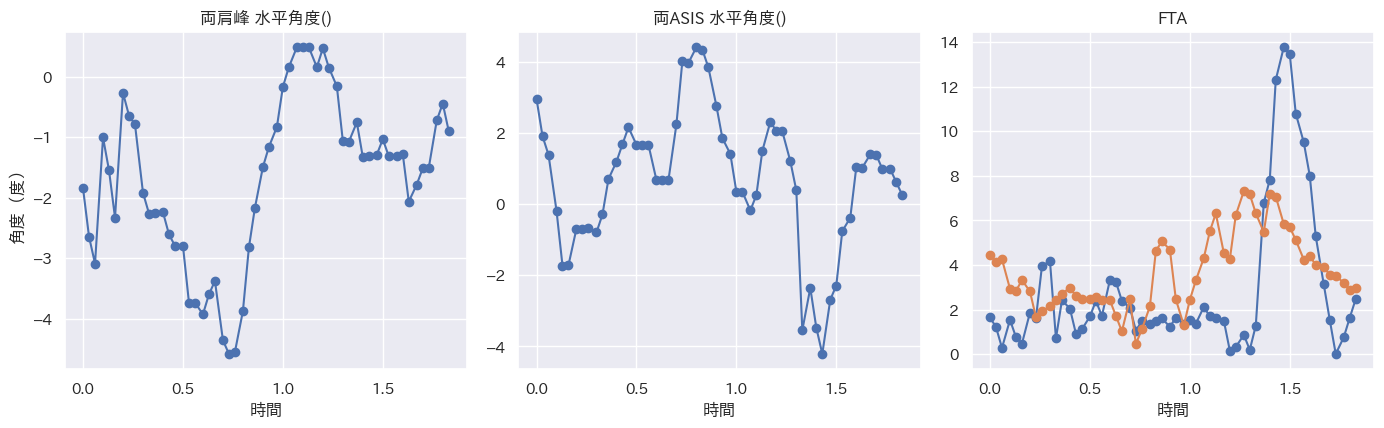

In [219]:
# 図全体のサイズを指定
plt.figure(figsize=(14, 8))
# サブプロットを作成（1行2列の構成）
plt.subplot(2, 3, 1)
plt.plot( front['t'], front['shoulder_horizonal_angle'], marker='o')
plt.title('両肩峰 水平角度()')
plt.xlabel('時間')
plt.ylabel('角度（度）')

plt.subplot(2, 3, 2)
plt.plot( front['t'], front['asis_horizonal_angle'], marker='o')
plt.title('両ASIS 水平角度()')
plt.xlabel('時間')

plt.subplot(2, 3, 3)
plt.plot( front['t'], front['L_FTA'], marker='o', label="左")
plt.plot( front['t'], front['R_FTA'], marker='o',label="右")
plt.title('FTA')
plt.xlabel('時間')

plt.tight_layout()  # グラフが重ならないように調整
plt.show()